In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [10]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # Real news

data = pd.concat([fake_df, true_df], ignore_index=True)

data = data.sample(frac=1).reset_index(drop=True)
X = data['text']
y = data['label']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9857461024498887
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.98      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9839
Recall: 0.9862
F1 Score: 0.9850


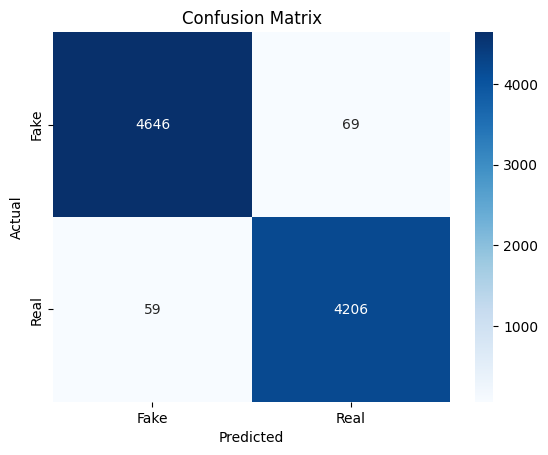

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Example Test Case

In [17]:
news = """The government has announced that every citizen will receive free laptops next week.
Please click this link to register immediately: free-laptops.xyz"""

news_tfidf = vectorizer.transform([news])

In [20]:
prediction = model.predict(news_tfidf)[0]  # 0 = Fake, 1 = Real

if prediction == 0:
    print("This news is likely FAKE.")
else:
    print("This news is likely REAL.")

probs = model.predict_proba(news_tfidf)[0]
print(f"Confidence - Fake: {probs[0]:.2f}, Real: {probs[1]:.2f}")

This news is likely FAKE.
Confidence - Fake: 0.78, Real: 0.22


In [21]:
real_news = "The Prime Minister visited flood-affected regions and announced a relief package of ₹500 crore."
fake_news = "NASA confirms Earth will go completely dark for 6 days in December."

for article in [real_news, fake_news]:
    tfidf = vectorizer.transform([article])
    pred = model.predict(tfidf)[0]
    label = "REAL" if pred == 1 else "FAKE"
    print(f"News: {article}\nPrediction: {label}\n")

News: The Prime Minister visited flood-affected regions and announced a relief package of ₹500 crore.
Prediction: REAL

News: NASA confirms Earth will go completely dark for 6 days in December.
Prediction: FAKE

